# Introduction
**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**<br>

**OS: Windows 11 Home Single Language 64-bit**<br>
**CPU: Intel Core i7-10750H @ 2.60GHz**<br>
**RAM: 16.0GB DDR4 @ 1464MHz**<br>
**Graphics: NVIDIA GeForce GTX 1650 (4GB)**<br>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'/kaggle/input/extrovert-vs-introvert-behavior-data/personality_dataset.csv')
df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert
...,...,...,...,...,...,...,...,...
2895,3.0,No,7.0,6.0,No,6.0,6.0,Extrovert
2896,3.0,No,8.0,3.0,No,14.0,9.0,Extrovert
2897,4.0,Yes,1.0,1.0,Yes,4.0,0.0,Introvert
2898,11.0,Yes,1.0,NaN,Yes,2.0,0.0,Introvert


# Data Preprocessing

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [6]:
df['Personality'].value_counts()

Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64

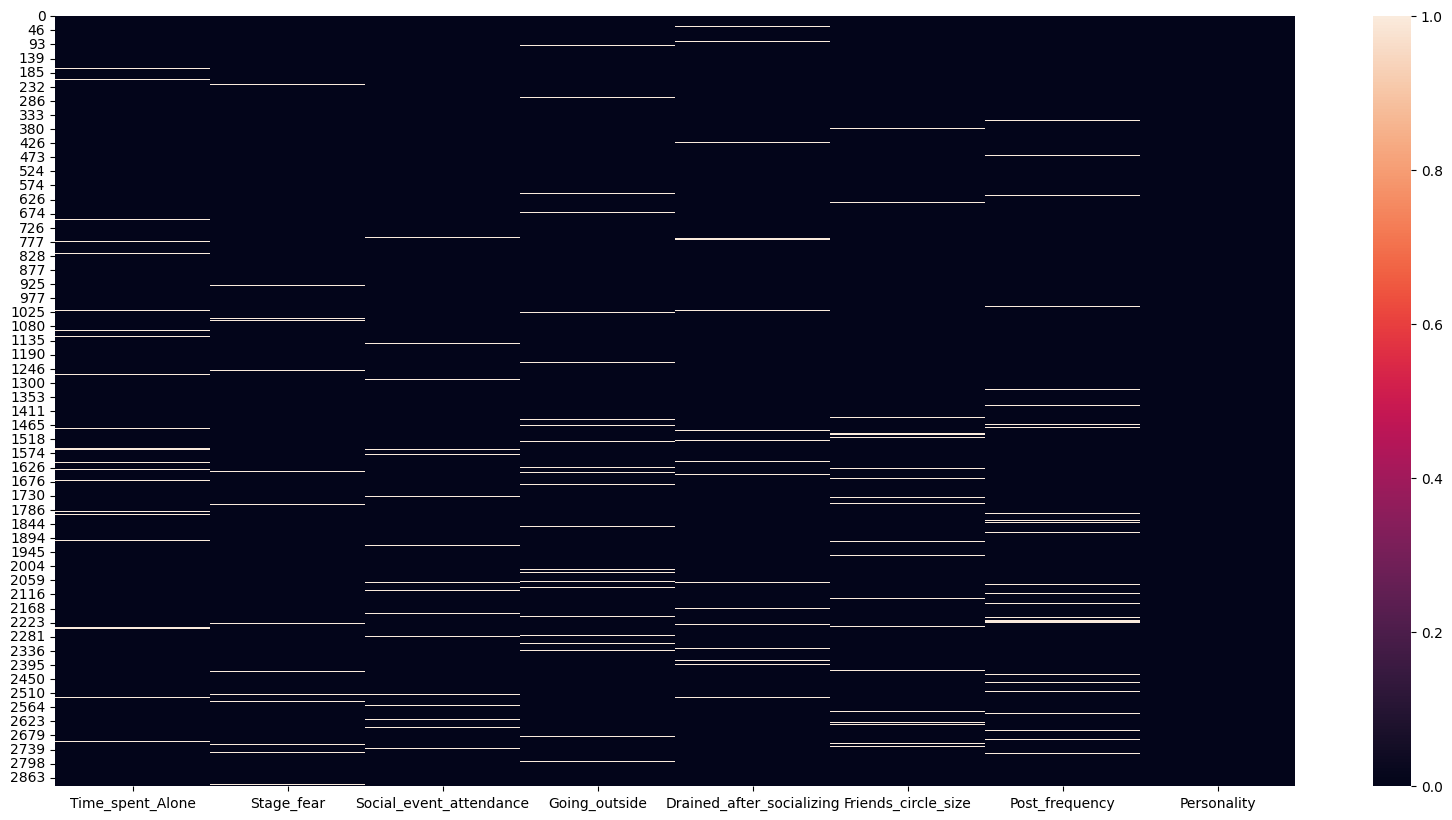

In [7]:
# Let us drop duplicates
df.drop_duplicates(inplace=True)
# Let us visualize the null values
plt.figure(figsize=(20,10))
sns.heatmap(df.isnull())
plt.show()

In [8]:
num_cols=[col for col in df.columns if df[col].isnull().any() and df[col].dtype!='object']
cat_cols=[col for col in df.columns if df[col].isnull().any() and col not in num_cols]
print(num_cols,'\n',cat_cols)

['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency'] 
 ['Stage_fear', 'Drained_after_socializing']


In [9]:
# We will impute missing values for the continuous variables using the median (target specific median)

for col in num_cols:
    med=df.groupby('Personality')[col].transform('median')
    df[col]=df[col].fillna(med)

# For categorical columns we will impute missing values with its mode

for col in cat_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2512 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2512 non-null   float64
 1   Stage_fear                 2512 non-null   object 
 2   Social_event_attendance    2512 non-null   float64
 3   Going_outside              2512 non-null   float64
 4   Drained_after_socializing  2512 non-null   object 
 5   Friends_circle_size        2512 non-null   float64
 6   Post_frequency             2512 non-null   float64
 7   Personality                2512 non-null   object 
dtypes: float64(5), object(3)
memory usage: 176.6+ KB


In [11]:
# Let us look at any problems with our categorical variables
cat_cols=[col for col in df.columns if df[col].dtype=='object']
for col in cat_cols:
    print(df[col].value_counts(),'\n')

Stage_fear
No     1421
Yes    1091
Name: count, dtype: int64 

Drained_after_socializing
No     1423
Yes    1089
Name: count, dtype: int64 

Personality
Extrovert    1417
Introvert    1095
Name: count, dtype: int64 



# EDA

In [12]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from statsmodels.graphics.mosaicplot import mosaic
import itertools

from sklearn.preprocessing import LabelEncoder

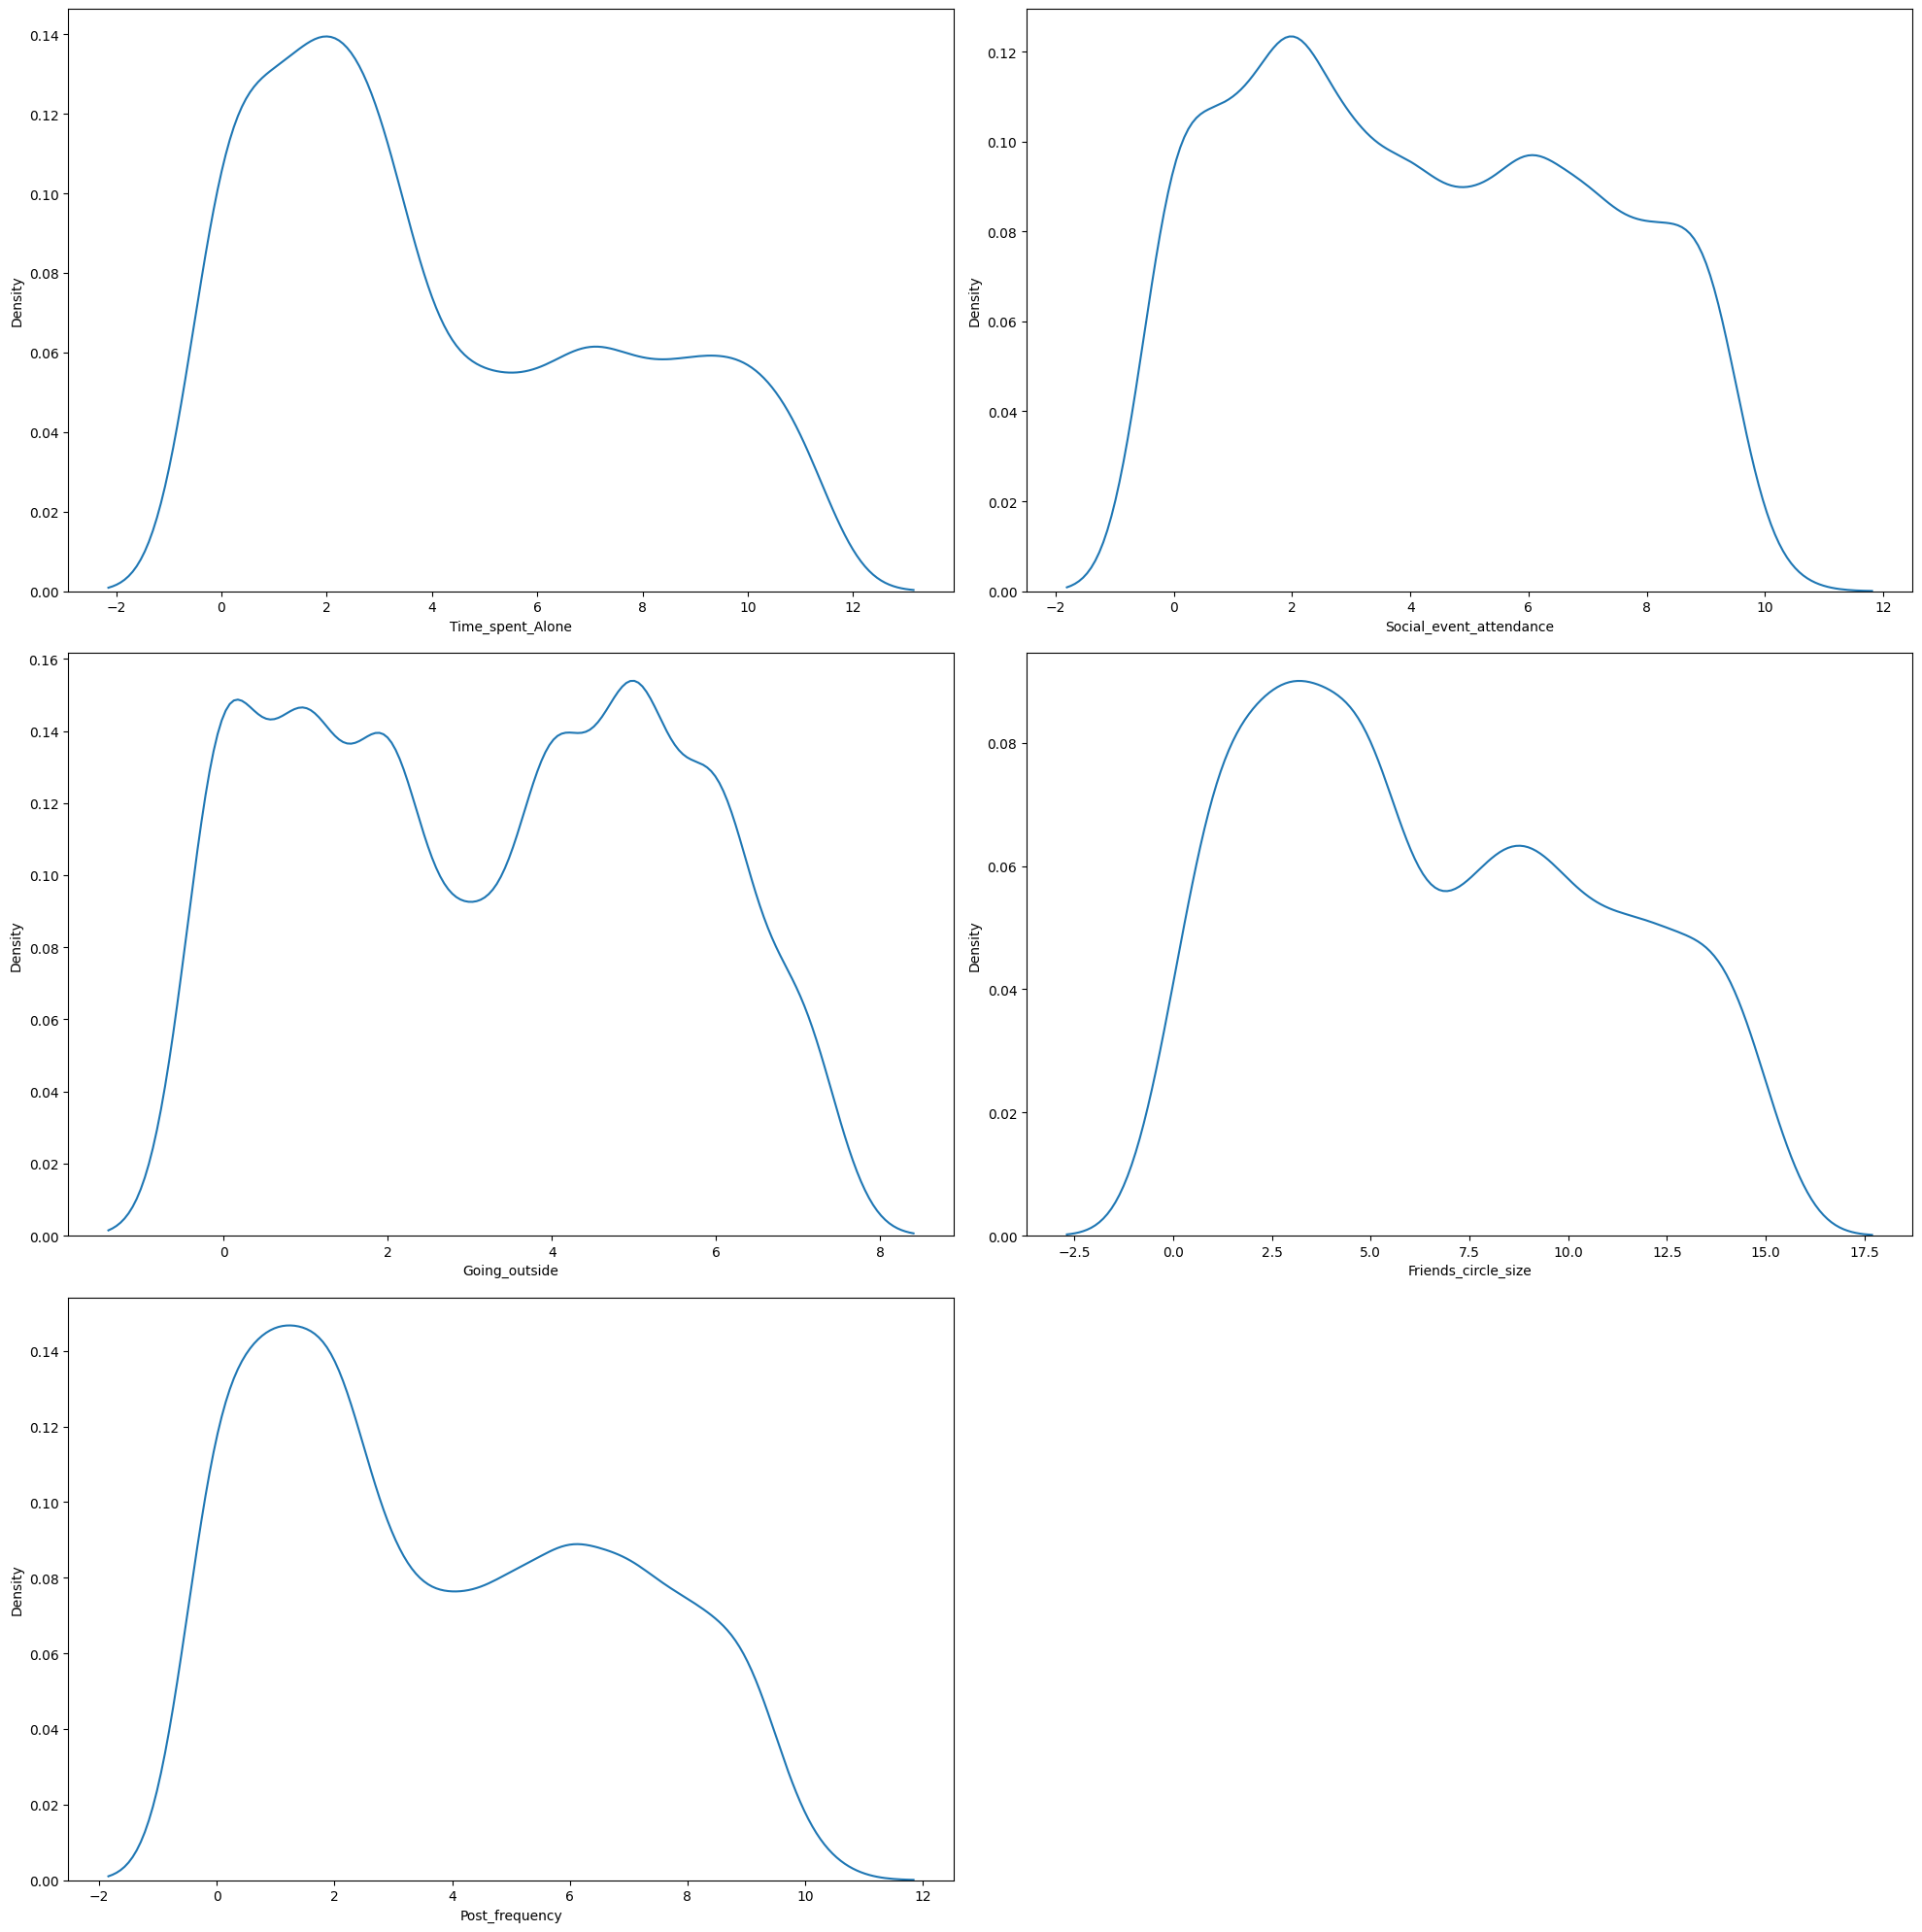

In [13]:
# Let us view the distributions of continuous variables using a kde plot

num_cols=[col for col in df.columns if df[col].dtype!='object']

fig,ax=plt.subplots(3,2,figsize=(20,20))
ax=ax.flatten()
plt.style.use('dark_background')
i=0
for col in num_cols:
    sns.kdeplot(df[col],ax=ax[i])
    i+=1
plt.tight_layout()
ax[5].axis('off')
plt.show()

### Insights

Kernel Density Estimates (KDEs) of key behavioral features reveal significant **non-Gaussian and multi-modal distributions**, suggesting the presence of distinct behavioral clusters among users. These patterns can provide valuable insights for downstream tasks such as clustering, feature engineering, or personality prediction.

---

#### Time_spent_alone
- The distribution is clearly **bimodal**, with local maxima around **2–3 hours** and **6–7 hours**.
- Indicates the presence of at least two user groups: those who spend minimal time alone and those who isolate for extended periods.
- This may correlate with **introversion**, **coping mechanisms**, or **lifestyle preferences**.

---

#### Social_event_attendance
- A **multi-modal** distribution with peaks near **2–3 events** and **5–6 events**, and a long tail extending beyond 10.
- Suggests a heterogeneous user base with varying degrees of social engagement.
- The absence of a normal distribution highlights the need for **robust scaling** techniques and possibly **log-transformation** or **binning**.

---

#### Going_outside
- Displays multiple peaks, indicating **high behavioral variance**.
- Peaks around **1–2** and **4–5** suggest that users fall into low- and moderate-mobility categories.
- Useful for **clustering models** and may act as a proxy for energy levels, mobility, or occupation type.

---

#### Friends_circle_size
- The distribution is **positively skewed** (right-tailed) with a primary mode around **3–5** friends.
- The long tail suggests a minority of users have significantly larger social networks.
- A good candidate for **outlier-aware analysis** or **log normalization**.
- Potentially predictive of extroverted traits or social connectivity.

---

#### Post_frequency
- Also **right-skewed**, with a strong mode around **1–2 posts/week** and a secondary elevation near **6–7 posts**.
- The presence of two peaks may indicate segmentation between **casual** and **frequent** content sharers.
- Could serve as a **proxy for digital extroversion** or openness in online behavior.


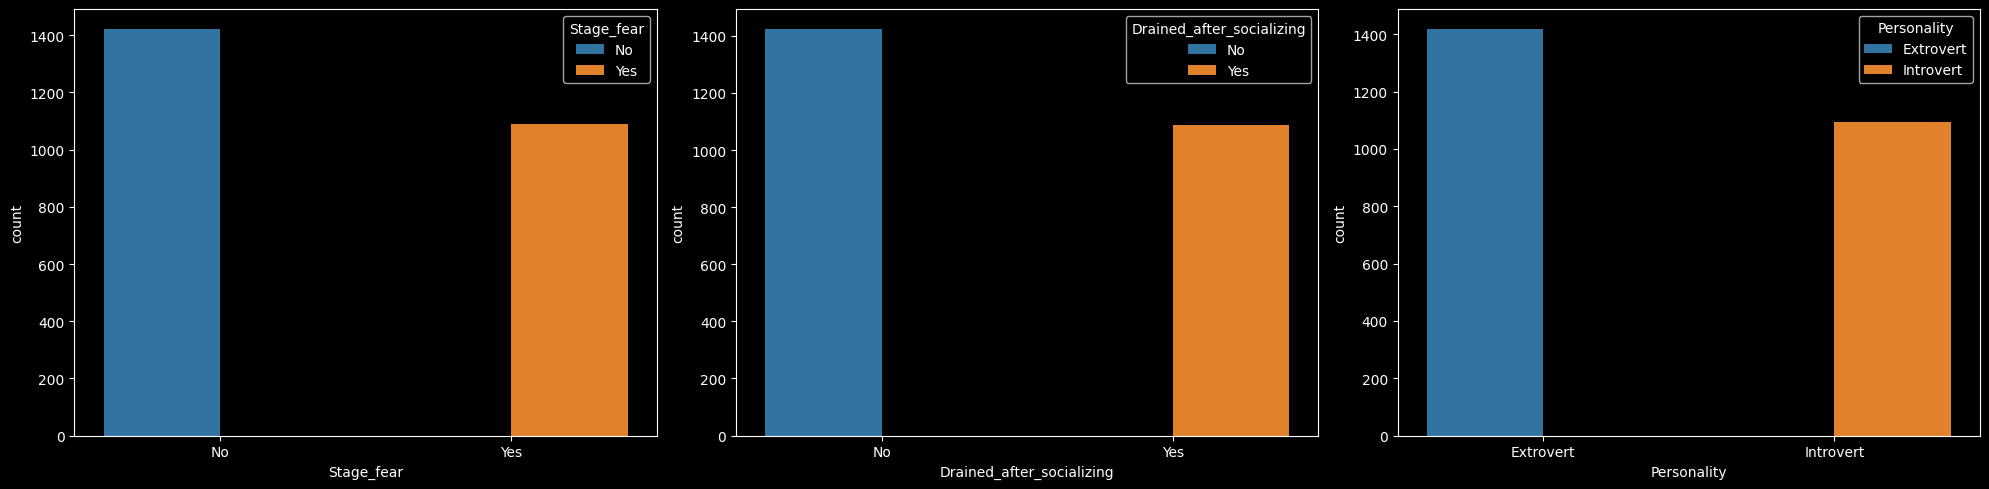

In [14]:
# Let us view the distribution of categorical values

fig,ax=plt.subplots(1,3,figsize=(20,5))
i=0
for col in cat_cols:
    sns.countplot(data=df,x=col,hue=col,ax=ax[i],palette='tab10')
    i+=1
plt.tight_layout()
plt.show()

### Insights

The histograms represent counts for three binary behavioral features: Stage Fright, Drained After Socializing, and Personality (Extrovert vs. Introvert). Below is a statistical breakdown of the distributions.

---

#### Stage_fright
- **No**: ~1400 users (56% of total).
- **Yes**: ~1100 users (44% of total).
- **Total**: ~2500 users.
- **Proportion Difference**: "No" is 12% higher than "Yes".

---

#### Drained_after_socializing
- **No**: ~1400 users (58.3% of total).
- **Yes**: ~1000 users (41.7% of total).
- **Total**: ~2400 users.
- **Proportion Difference**: "No" is 16.6% higher than "Yes".

---

#### Personality (Extrovert vs. Introvert)
- **Extrovert**: ~1400 users (58.3% of total).
- **Yes**: ~1000 users (41.7% of total).
- **Total**: ~2400 users.
- **Proportion Difference**: "Extrovert" is 16.6% higher than "Introvert".

---

### Summary
- All features show a binary distribution with a clear majority in one category.
- **Stage Fright**: 56% "No" vs. 44% "Yes" (12% difference).
- **Drained After Socializing**: 58.3% "No" vs. 41.7% "Yes" (16.6% difference).
- **Personality**: 58.3% "Extrovert" vs. 41.7% "Introvert" (16.6% difference).
- The consistent higher proportion of "No" and "Extrovert" responses suggests a skew toward extroverted traits in the dataset.

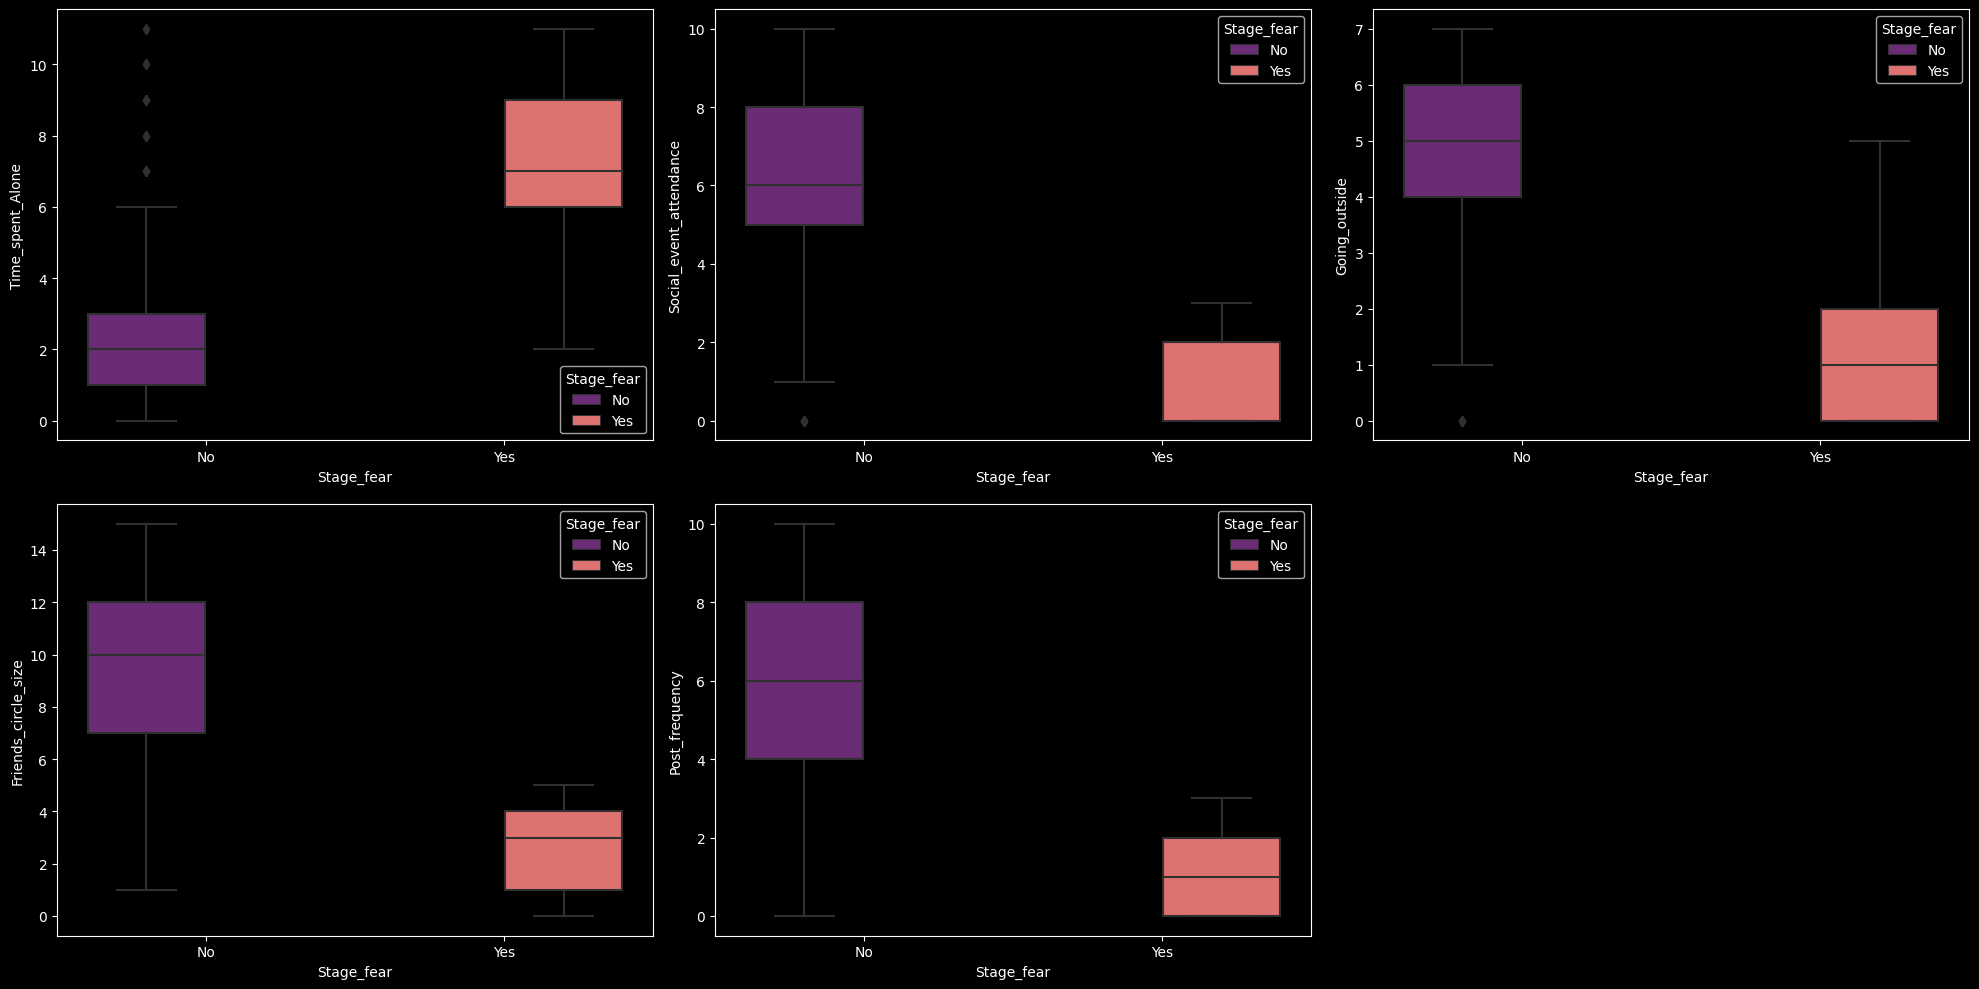

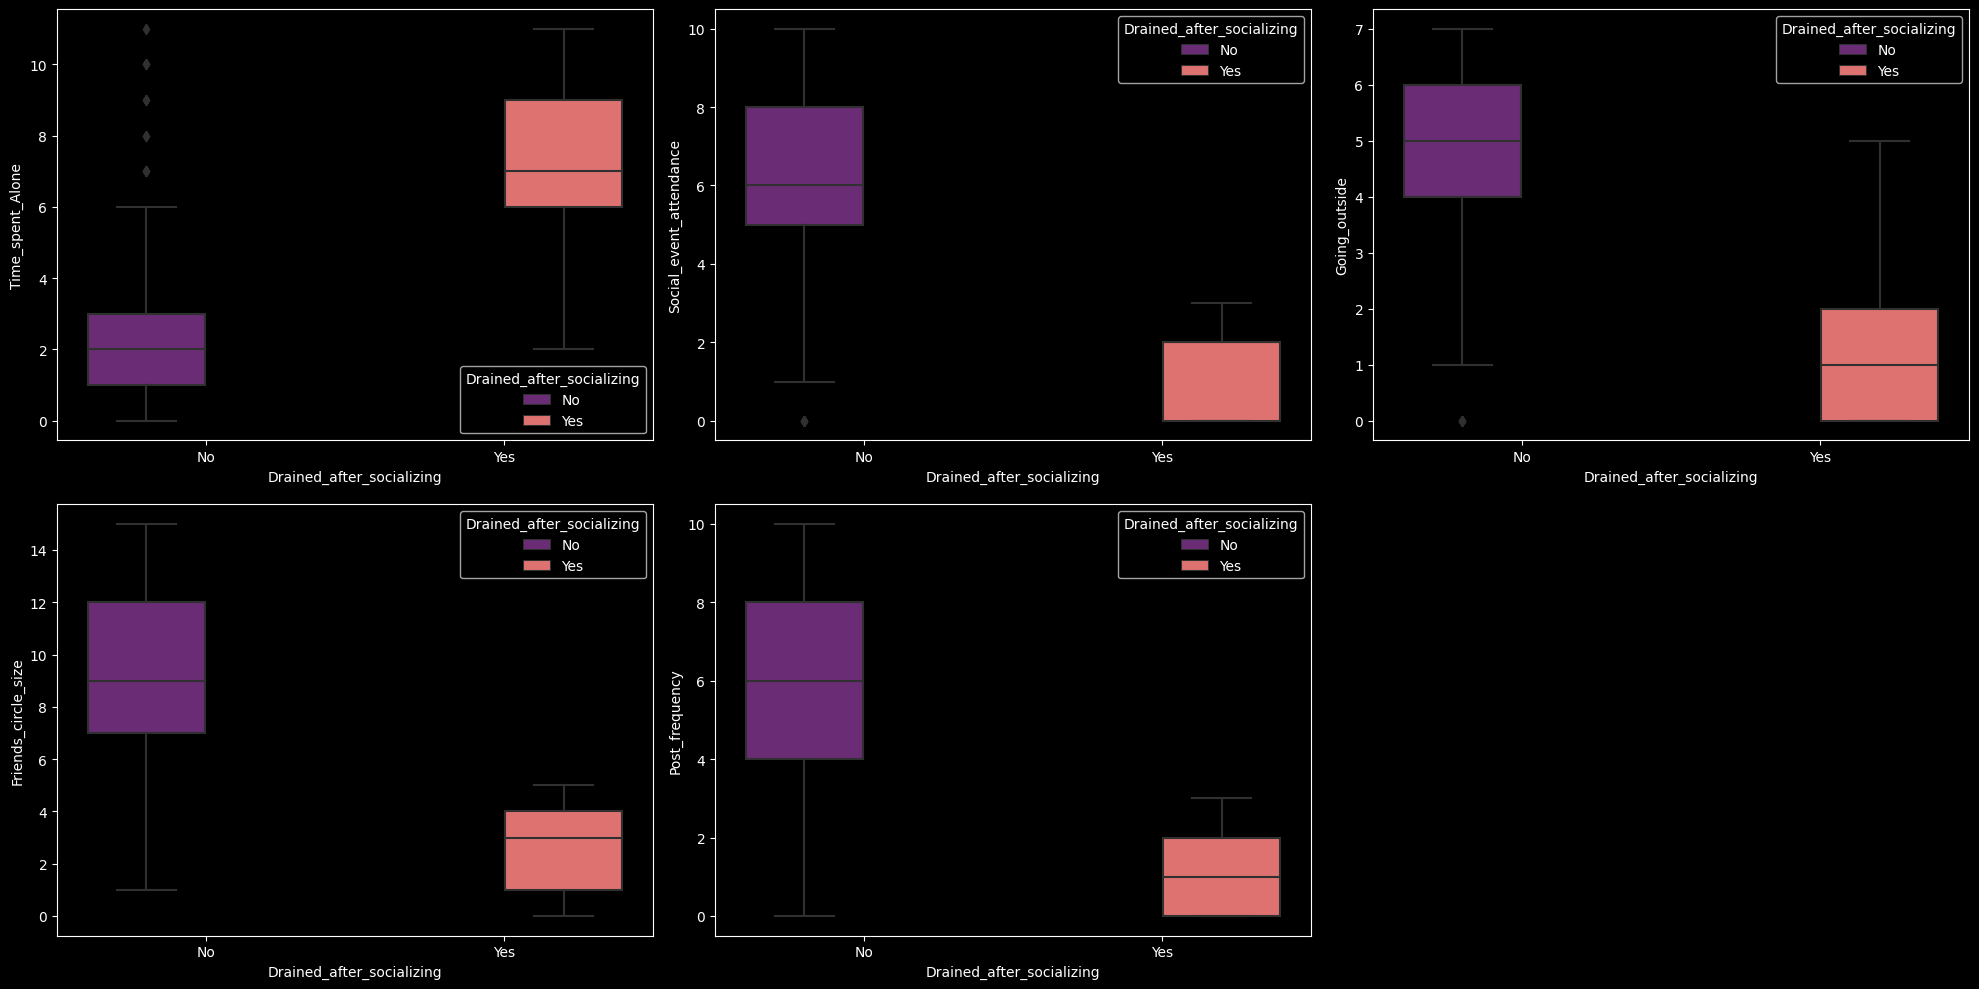

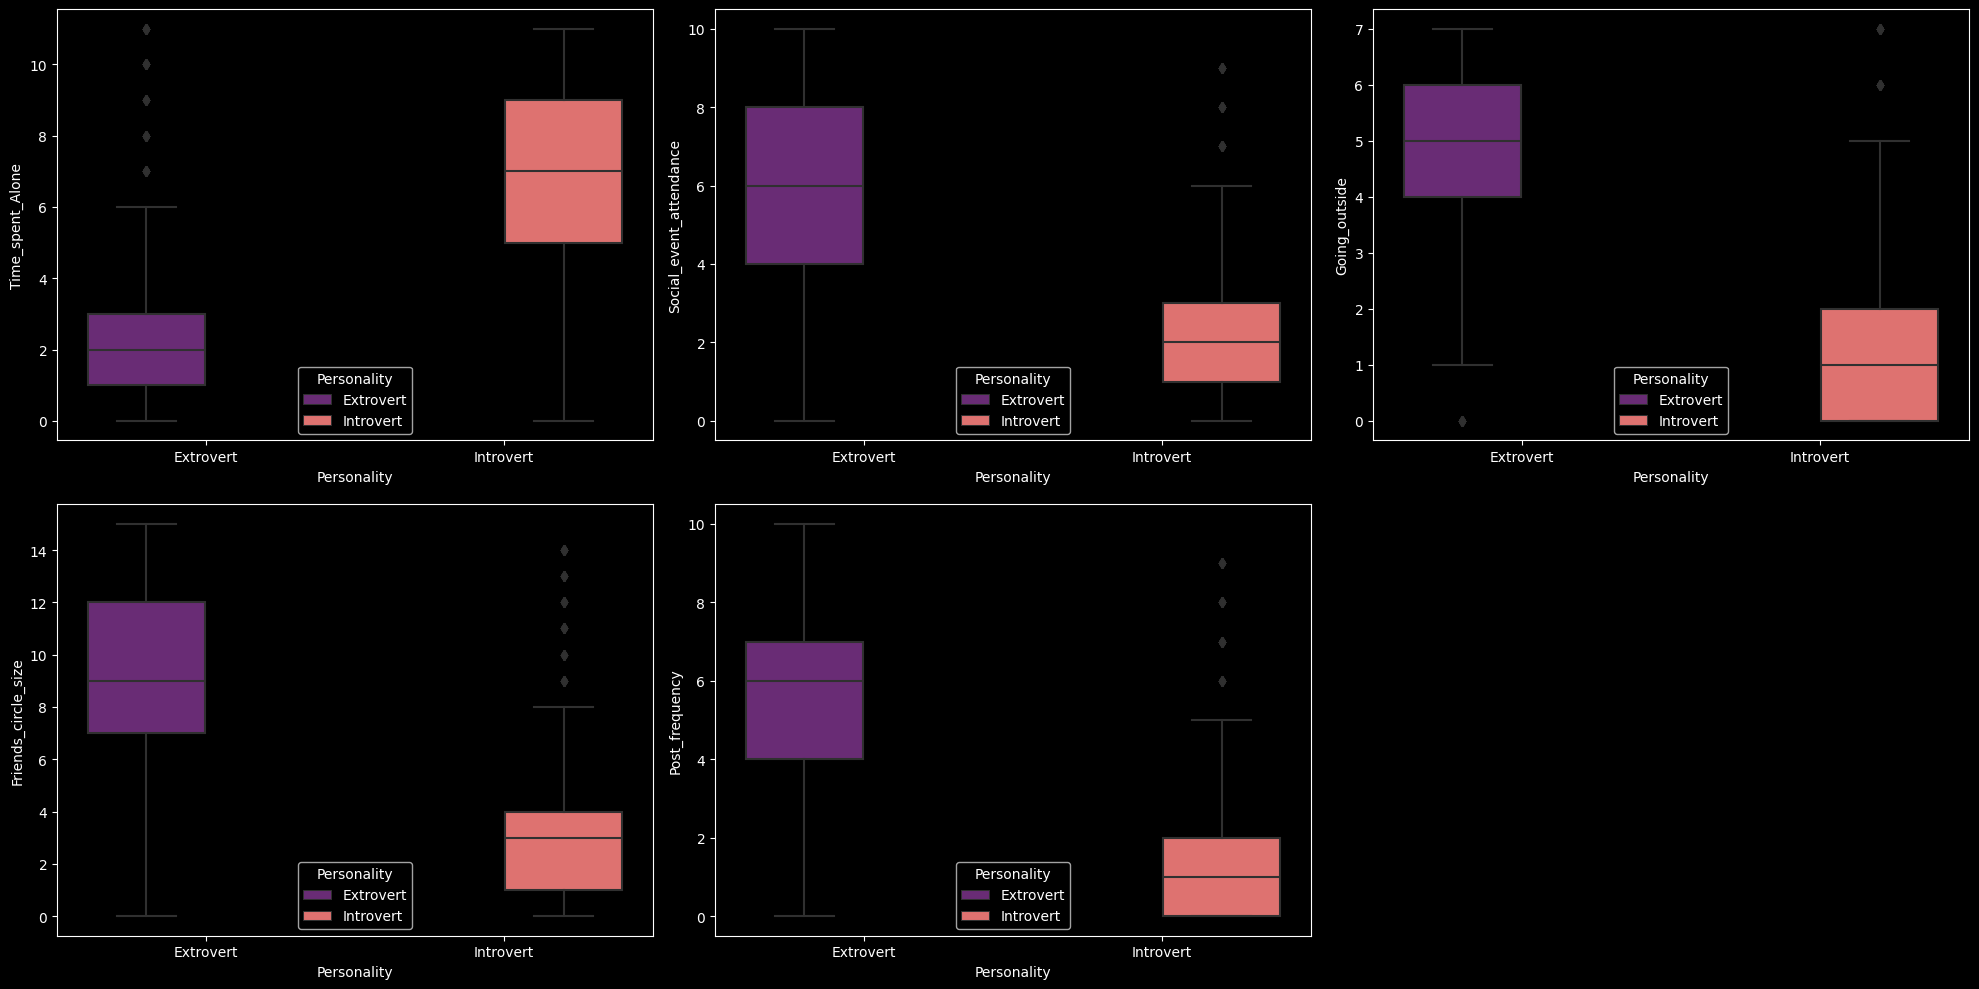

In [15]:
# Let us look at how our continuous values are related to our categorical variables including our target variable

for cat in cat_cols:
    fig,ax=plt.subplots(2,3,figsize=(20,10))
    ax=ax.flatten()
    i=0
    for col in num_cols:
        sns.boxplot(data=df,y=col,x=cat,hue=cat,ax=ax[i],palette='magma')
        i+=1
    plt.tight_layout()
    ax[5].axis('off')
    plt.show()

### Insights

The box plots display the distributions of three numerical behavioral features—Time Spent Alone, Social Event Attendance, and Friends Circle Size—across binary categories of Stage Fright, Drained After Socializing, and Personality (Extrovert vs. Introvert). Below is a statistical breakdown of the distributions.

---

### Time_spent_alone

#### Across Stage_fright
- **No**: Median ~2 hours, IQR ~1–3 hours, range ~0–10 hours, with outliers up to 10 hours.
- **Yes**: Median ~7 hours, IQR ~6–8 hours, range ~2–10 hours, with outliers up to 10 hours.
- **Observation**: Individuals with stage fright tend to spend more time alone (median 7 vs. 2 hours).

#### Across Drained_after_socializing
- **No**: Median ~2 hours, IQR ~1–3 hours, range ~0–10 hours, with outliers up to 10 hours.
- **Yes**: Median ~7 hours, IQR ~6–8 hours, range ~2–10 hours, with outliers up to 10 hours.
- **Observation**: Those drained after socializing spend significantly more time alone (median 7 vs. 2 hours).

#### Across Personality
- **Extrovert**: Median ~2 hours, IQR ~1–3 hours, range ~0–10 hours, with outliers up to 10 hours.
- **Introvert**: Median ~7 hours, IQR ~6–8 hours, range ~2–10 hours, with outliers up to 10 hours.
- **Observation**: Introverts spend more time alone compared to extroverts (median 7 vs. 2 hours).

---

### Social_event_attendance

#### Across Stage_fright
- **No**: Median ~4 events, IQR ~3–5 events, range ~1–6 events, with outliers up to 10 events.
- **Yes**: Median ~2 events, IQR ~1–3 events, range ~0–4 events, with outliers up to 8 events.
- **Observation**: Individuals without stage fright attend more social events (median 4 vs. 2 events).

#### Across Drained_after_socializing
- **No**: Median ~4 events, IQR ~3–5 events, range ~1–6 events, with outliers up to 10 events.
- **Yes**: Median ~2 events, IQR ~1–3 events, range ~0–4 events, with outliers up to 8 events.
- **Observation**: Those not drained after socializing attend more events (median 4 vs. 2 events).

#### Across Personality
- **Extrovert**: Median ~4 events, IQR ~3–5 events, range ~1–6 events, with outliers up to 10 events.
- **Introvert**: Median ~2 events, IQR ~1–3 events, range ~0–4 events, with outliers up to 8 events.
- **Observation**: Extroverts attend more social events than introverts (median 4 vs. 2 events).

---

### Going_outside

#### Across Stage_fright
- **No**: Median ~2 outings, IQR ~1–3 outings, range ~0–4 outings, with outliers up to 6 outings.
- **Yes**: Median ~1 outing, IQR ~0–2 outings, range ~0–3 outings, with outliers up to 5 outings.
- **Observation**: Individuals without stage fright go outside more often (median 2 vs. 1 outing).

#### Across Drained_after_socializing
- **No**: Median ~2 outings, IQR ~1–3 outings, range ~0–4 outings, with outliers up to 6 outings.
- **Yes**: Median ~1 outing, IQR ~0–2 outings, range ~0–3 outings, with outliers up to 5 outings.
- **Observation**: Those not drained after socializing go outside more frequently (median 2 vs. 1 outing).

#### Across Personality
- **Extrovert**: Median ~2 outings, IQR ~1–3 outings, range ~0–4 outings, with outliers up to 6 outings.
- **Introvert**: Median ~1 outing, IQR ~0–2 outings, range ~0–3 outings, with outliers up to 5 outings.
- **Observation**: Extroverts go outside more often than introverts (median 2 vs. 1 outing).

---

### Friends_circle_size

#### Across Stage_fright
- **No**: Median ~10 friends, IQR ~8–12 friends, range ~4–14 friends, with outliers up to 14 friends.
- **Yes**: Median ~3 friends, IQR ~2–4 friends, range ~0–6 friends, with outliers up to 10 friends.
- **Observation**: Individuals without stage fright have larger friend circles (median 10 vs. 3 friends).

#### Across Drained_after_socializing
- **No**: Median ~10 friends, IQR ~8–12 friends, range ~4–14 friends, with outliers up to 14 friends.
- **Yes**: Median ~3 friends, IQR ~2–4 friends, range ~0–6 friends, with outliers up to 10 friends.
- **Observation**: Those not drained after socializing have larger friend circles (median 10 vs. 3 friends).

#### Across Personality
- **Extrovert**: Median ~10 friends, IQR ~8–12 friends, range ~4–14 friends, with outliers up to 14 friends.
- **Introvert**: Median ~3 friends, IQR ~2–4 friends, range ~0–6 friends, with outliers up to 10 friends.
- **Observation**: Extroverts have significantly larger friend circles than introverts (median 10 vs. 3 friends).

---

### Post_frequency

#### Across Stage_fright
- **No**: Median ~4 posts, IQR ~3–5 posts, range ~1–6 posts, with outliers up to 10 posts.
- **Yes**: Median ~2 posts, IQR ~1–3 posts, range ~0–4 posts, with outliers up to 8 posts.
- **Observation**: Individuals without stage fright post more frequently (median 4 vs. 2 posts).

#### Across Drained_after_socializing
- **No**: Median ~4 posts, IQR ~3–5 posts, range ~1–6 posts, with outliers up to 10 posts.
- **Yes**: Median ~2 posts, IQR ~1–3 posts, range ~0–4 posts, with outliers up to 8 posts.
- **Observation**: Those not drained after socializing post more often (median 4 vs. 2 posts).

#### Across Personality
- **Extrovert**: Median ~4 posts, IQR ~3–5 posts, range ~1–6 posts, with outliers up to 10 posts.
- **Introvert**: Median ~2 posts, IQR ~1–3 posts, range ~0–4 posts, with outliers up to 8 posts.
- **Observation**: Extroverts post more frequently than introverts (median 4 vs. 2 posts).

---

### Summary
- **Time_spent_alone**: Median difference of 5 hours across all binary features, with introverts, those with stage fright, and those drained after socializing spending more time alone.
- **Social_event_attendance**: Median difference of 2 events, with extroverts and those without stage fright or social exhaustion attending more events.
- **Going_outside**: Median difference of 1 outing, with extroverts and those not drained after socializing going outside more often.
- **Friends_circle_size**: Median difference of 7 friends, with extroverts and those without stage fright or social exhaustion having larger friend circles.
- **Post_frequency**: Median difference of 2 posts, with extroverts and those without stage fright or social exhaustion posting more frequently.
- The distributions show significant differences across categories, indicating strong associations between personality traits and behavioral features.

In [16]:
# Let us look at how our continuous values are dependent on each other
num_cols

['Time_spent_Alone',
 'Social_event_attendance',
 'Going_outside',
 'Friends_circle_size',
 'Post_frequency']

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_381/2693599539.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


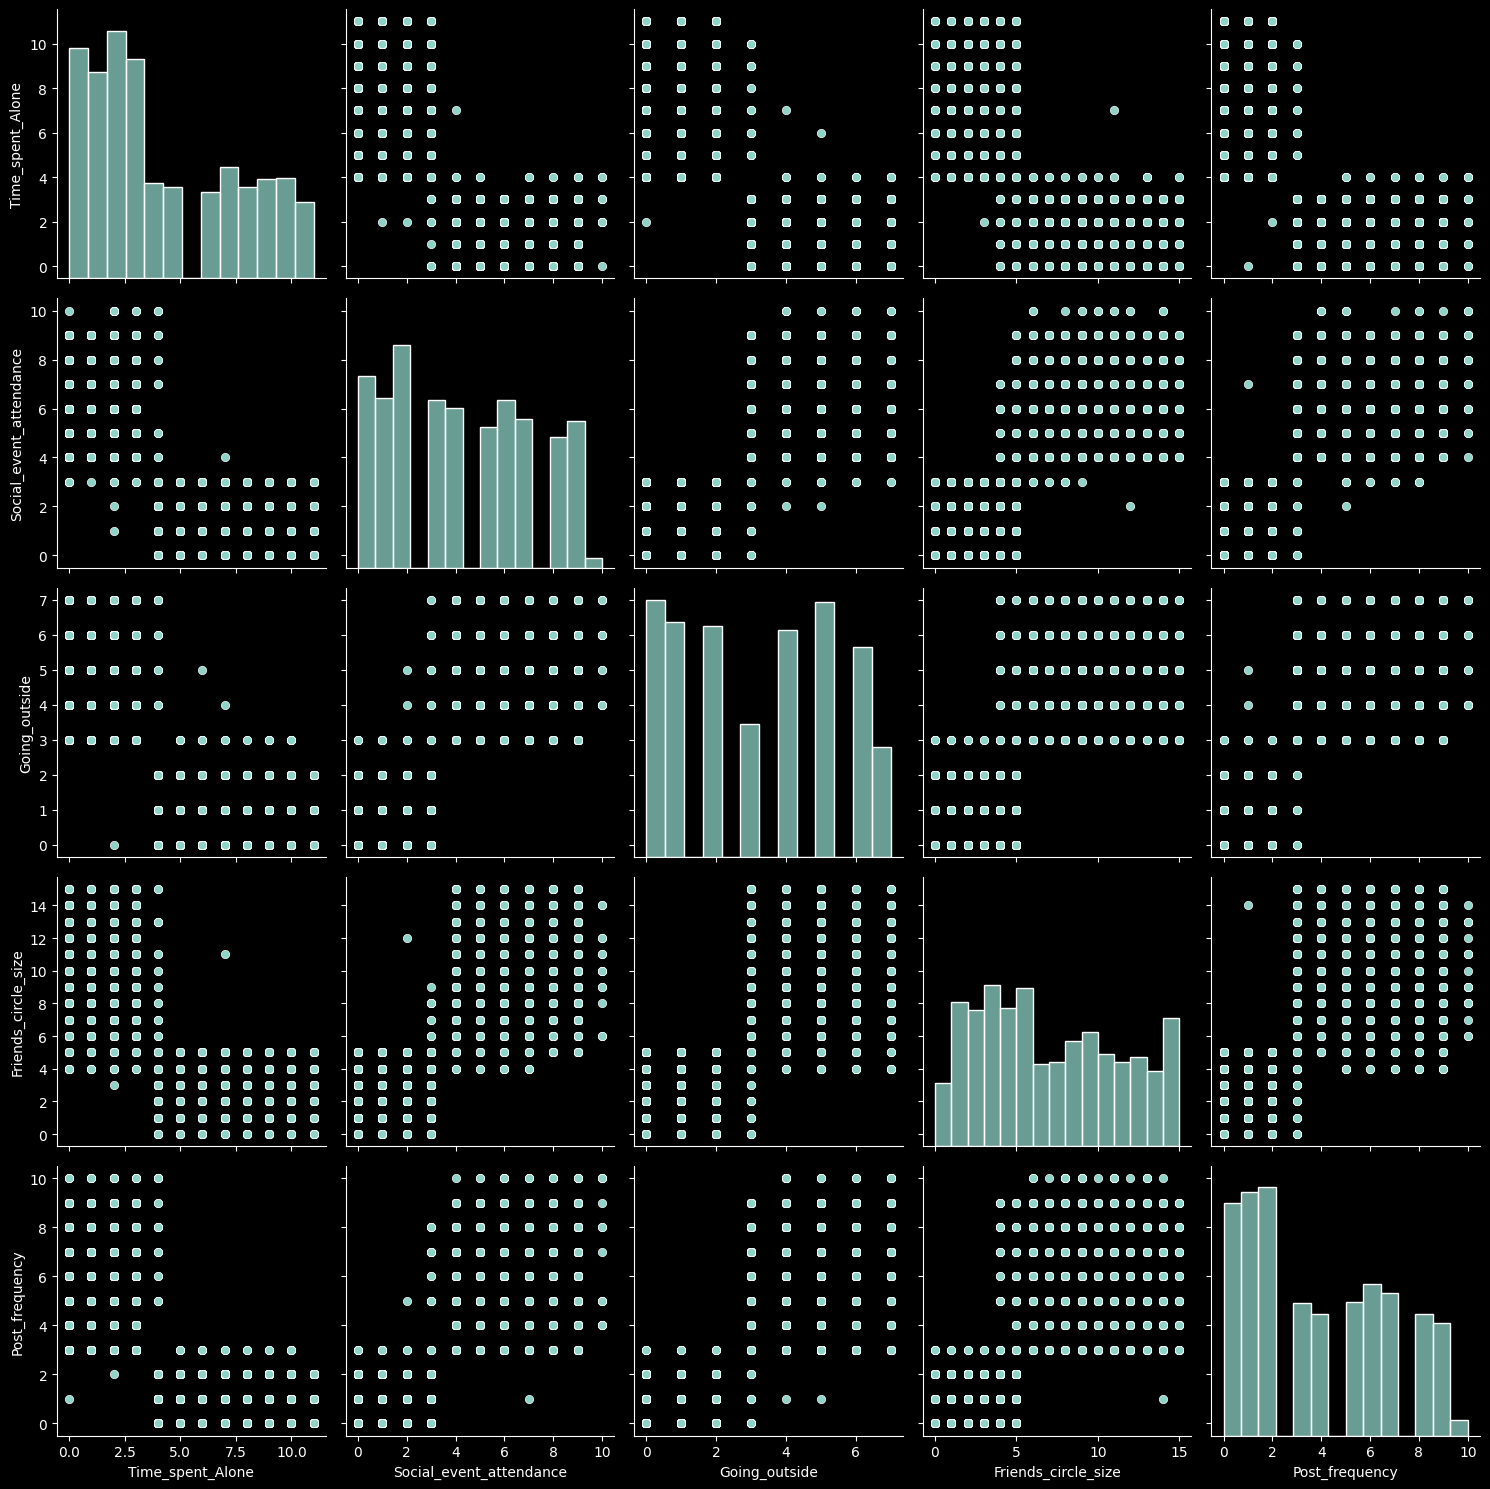

In [17]:
# Let us plot a pairplot
tdf = df[num_cols]  
sns.pairplot(tdf, height=3)
plt.tight_layout()
plt.show()

### Findings

#### Time_spent_alone vs. Social_event_attendance
- **Pattern**: Negative trend—higher time spent alone corresponds to fewer social events attended.
- **Observation**: Users spending more time alone (e.g., 7–10 hours) tend to attend fewer events (0–3 events), while those spending less time alone (0–3 hours) attend more events (4–8 events).

#### Time_spent_alone vs. Going_outside
- **Pattern**: Negative trend—higher time spent alone correlates with fewer outings.
- **Observation**: Users spending 7–10 hours alone go outside less (0–2 outings), while those spending 0–3 hours alone go outside more (3–5 outings).

#### Time_spent_alone vs. Friends_circle_size
- **Pattern**: Negative trend—higher time spent alone is associated with smaller friend circles.
- **Observation**: Users spending 7–10 hours alone have smaller friend circles (0–5 friends), while those spending 0–3 hours alone have larger circles (8–15 friends).

#### Time_spent_alone vs. Post_frequency
- **Pattern**: Negative trend—higher time spent alone corresponds to lower posting frequency.
- **Observation**: Users spending 7–10 hours alone post less (0–3 posts), while those spending 0–3 hours alone post more (4–8 posts).

#### Social_event_attendance vs. Going_outside
- **Pattern**: Positive trend—more social event attendance correlates with more outings.
- **Observation**: Users attending 4–8 events go outside more (3–6 outings), while those attending 0–2 events go outside less (0–2 outings).

#### Social_event_attendance vs. Friends_circle_size
- **Pattern**: Positive trend—higher social event attendance is associated with larger friend circles.
- **Observation**: Users attending 4–8 events have larger friend circles (8–15 friends), while those attending 0–2 events have smaller circles (0–5 friends).

#### Social_event_attendance vs. Post_frequency
- **Pattern**: Positive trend—higher social event attendance corresponds to higher posting frequency.
- **Observation**: Users attending 4–8 events post more (4–8 posts), while those attending 0–2 events post less (0–3 posts).

#### Going_outside vs. Friends_circle_size
- **Pattern**: Positive trend—more outings are associated with larger friend circles.
- **Observation**: Users going outside 3–6 times have larger friend circles (8–15 friends), while those going out 0–2 times have smaller circles (0–5 friends).

#### Going_outside vs. Post_frequency
- **Pattern**: Positive trend—more outings correlate with higher posting frequency.
- **Observation**: Users going outside 3–6 times post more (4–8 posts), while those going out 0–2 times post less (0–3 posts).

#### Friends_circle_size vs. Post_frequency
- **Pattern**: Positive trend—larger friend circles are associated with higher posting frequency.
- **Observation**: Users with 8–15 friends post more (4–8 posts), while those with 0–5 friends post less (0–3 posts).

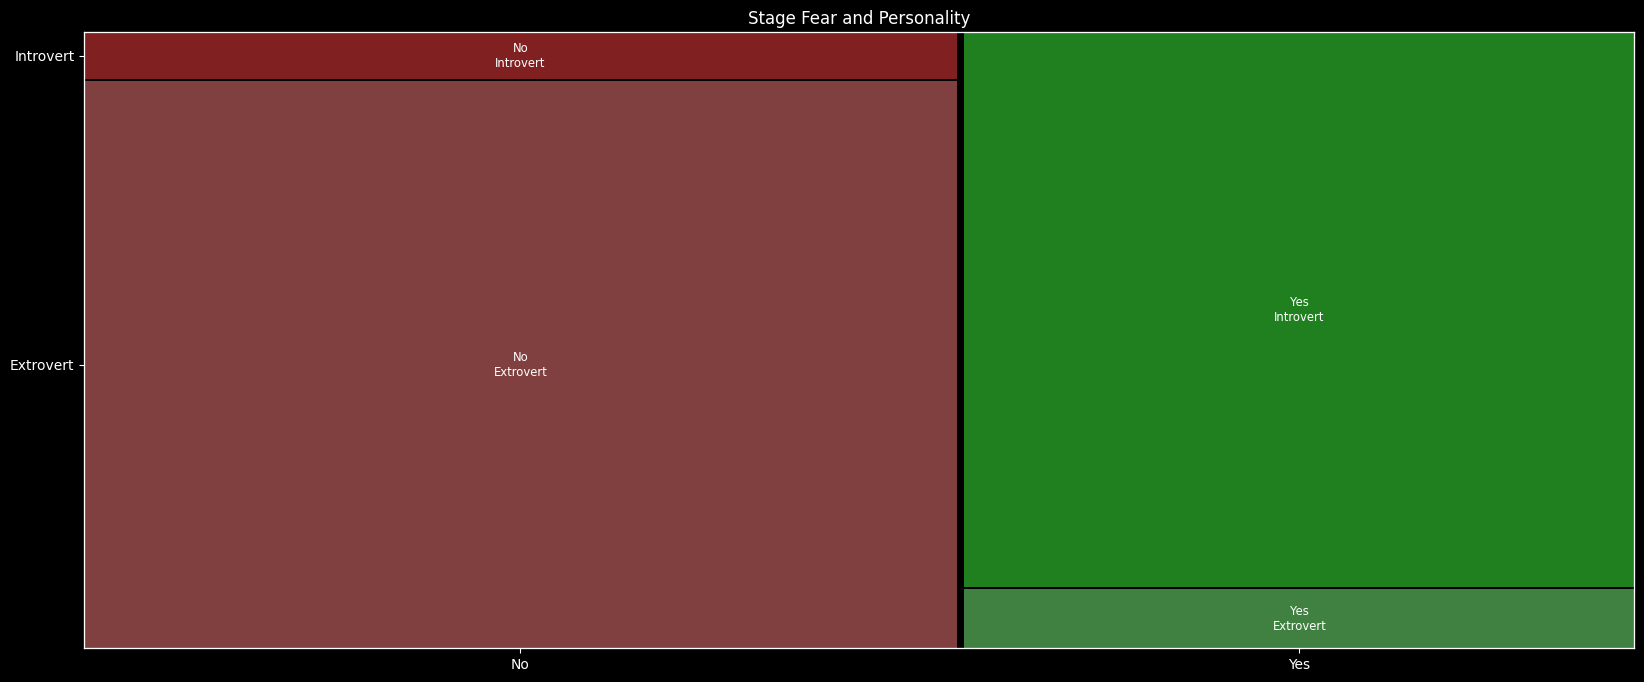

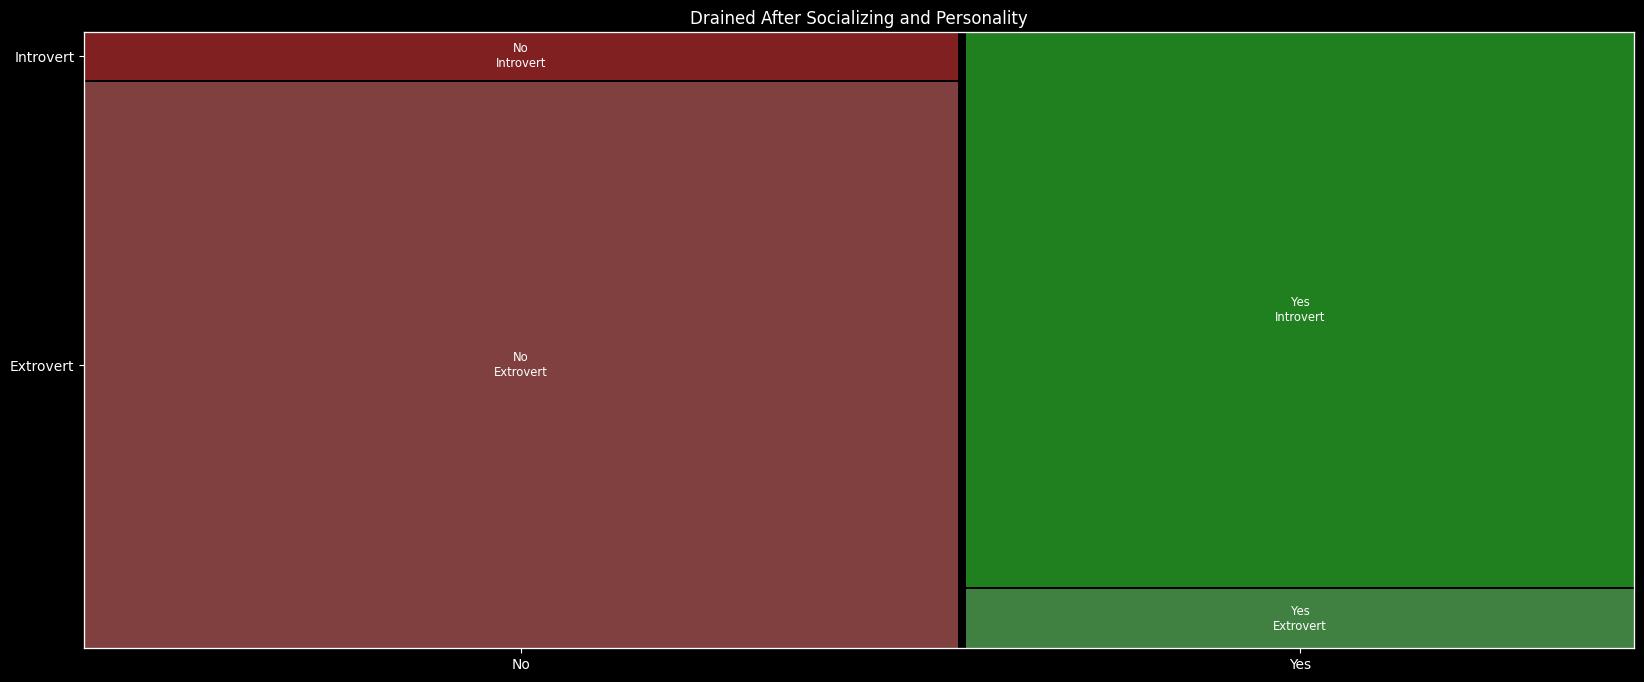

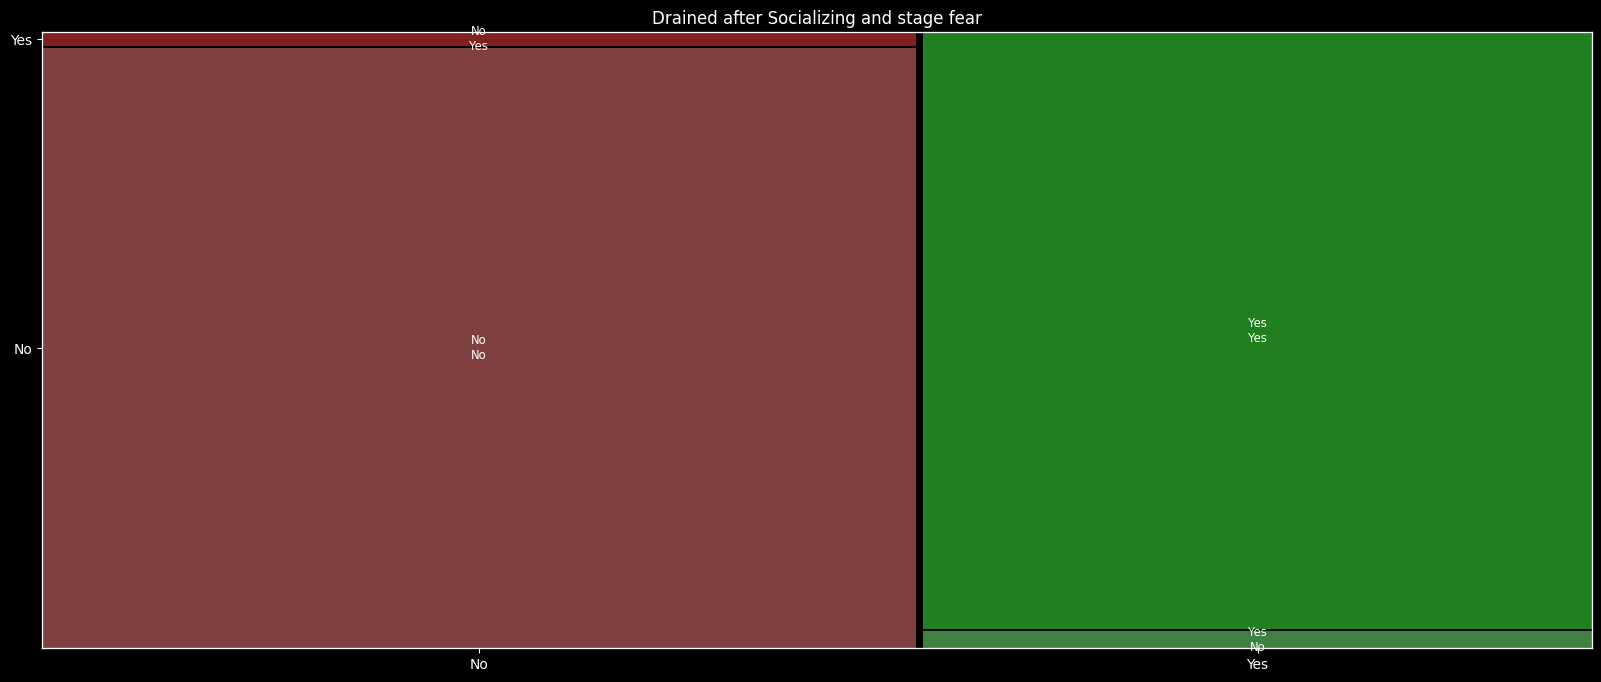

In [18]:
# Let us look at how our categorical variables are related to each other
# Best way I like to find its through a mosaic plot

contingency_table=pd.crosstab(df['Stage_fear'], df['Personality'])
contingency_dict = contingency_table.stack()
fig, ax = plt.subplots(figsize=(20, 8))
mosaic(contingency_dict,ax=ax,title='Stage Fear and Personality')
plt.show()

contingency_table=pd.crosstab(df['Drained_after_socializing'], df['Personality'])
contingency_dict = contingency_table.stack()
fig, ax = plt.subplots(figsize=(20, 8))
mosaic(contingency_dict,ax=ax,title='Drained After Socializing and Personality')
plt.show()

contingency_table=pd.crosstab(df['Drained_after_socializing'], df['Stage_fear'])
contingency_dict = contingency_table.stack()
fig, ax = plt.subplots(figsize=(20, 8))
mosaic(contingency_dict,ax=ax,title='Drained after Socializing and stage fear')
plt.show()

### Findings

The contingency tables display the joint distributions of Personality (Extrovert vs. Introvert) with Stage Fright and Drained After Socializing, as well as the joint distribution of Stage Fright and Drained After Socializing. Below is a statistical breakdown of the distributions.

---

### Stage Fear and Personality

#### Distribution
- **Extrovert, No Stage Fear**: Largest group (green region).
- **Extrovert, Yes Stage Fear**: Smaller group (bottom right, green region).
- **Introvert, No Stage Fear**: Moderate group (top left, red region).
- **Introvert, Yes Stage Fear**: Smallest group (top right, red region).

#### Observation
- Extroverts are more likely to have no stage fear compared to introverts.
- Introverts are more evenly split between having and not having stage fear, but the "Yes" group is the smallest overall.

---

### Drained After Socializing and Personality

#### Distribution
- **Extrovert, Not Drained After Socializing**: Largest group (green region).
- **Extrovert, Drained After Socializing**: Smaller group (bottom right, green region).
- **Introvert, Not Drained After Socializing**: Moderate group (top left, red region).
- **Introvert, Drained After Socializing**: Smallest group (top right, red region).

#### Observation
- Extroverts are predominantly not drained after socializing.
- Introverts are more likely to be drained after socializing, but the "Drained" group is the smallest overall.

---

### Drained After Socializing and Stage Fear

#### Distribution
- **Not Drained, No Stage Fear**: Largest group (green region).
- **Not Drained, Yes Stage Fear**: Smaller group (bottom right, green region).
- **Drained, No Stage Fear**: Moderate group (top left, red region).
- **Drained, Yes Stage Fear**: Smallest group (top right, red region).

#### Observation
- Individuals who are not drained after socializing are more likely to have no stage fear.
- Those who are drained after socializing are more evenly split between having and not having stage fear, but the "Drained and Yes Stage Fear" group is the smallest.

---

### Summary
- **Stage Fear and Personality**:
  - Extroverts predominantly have no stage fear, while introverts show a more balanced distribution but with fewer in the "Yes Stage Fear" category.
- **Drained After Socializing and Personality**:
  - Extroverts are mostly not drained after socializing, while introverts are more likely to be drained, though the "Drained" introvert group is the smallest.
- **Drained After Socializing and Stage Fear**:
  - The majority of individuals are neither drained after socializing nor have stage fear. The smallest group is those who are both drained and have stage fear.
- **Overall Trends**:
  - Extroverts tend to exhibit fewer traits associated with social anxiety (stage fear, feeling drained).
  - Introverts show a higher propensity for social anxiety traits, but these traits are less common overall in the dataset.

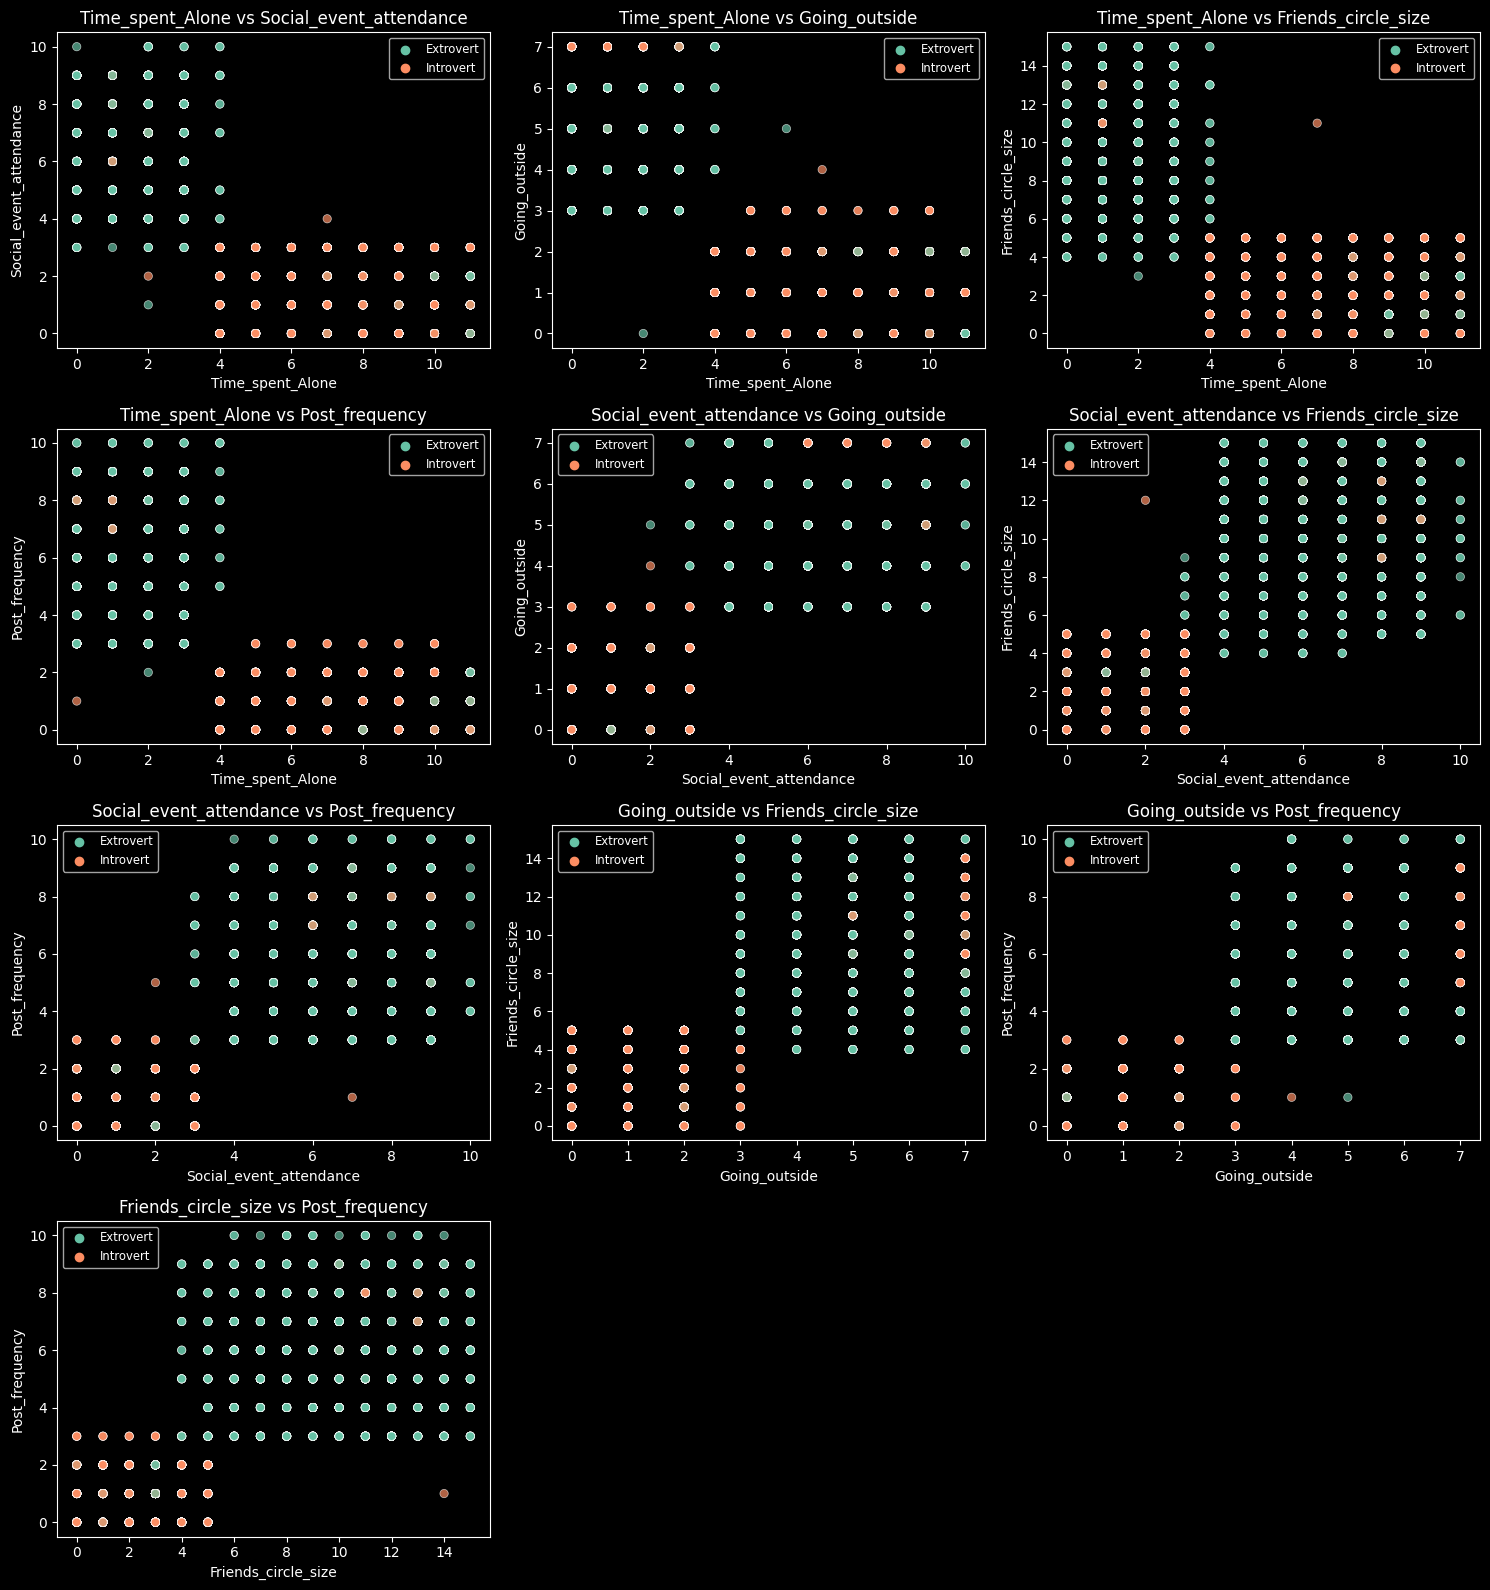

In [19]:
cols = ['Time_spent_Alone', 'Social_event_attendance', 'Going_outside', 'Friends_circle_size', 'Post_frequency']
hue_col = 'Personality'


pairs = list(itertools.combinations(cols, 2))

n_pairs = len(pairs)
n_cols = 3  
n_rows = (n_pairs + n_cols - 1) // n_cols

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, (x_col, y_col) in enumerate(pairs, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=df, x=x_col, y=y_col, hue=hue_col, palette='Set2', alpha=0.7)
    plt.title(f'{x_col} vs {y_col}')
    plt.legend(loc='best', fontsize='small')

plt.tight_layout()
plt.show()


### Insights
**Some conclusions and findings will be overlapping the ones of pairplots**

The scatter plots display pairwise relationships between five numerical behavioral features—Time Spent Alone, Social Event Attendance, Going Outside, Friends Circle Size, and Post Frequency—categorized by Personality (Extrovert vs. Introvert). Below is a statistical breakdown of the relationships.

---

### Time_spent_alone Relationships

#### Time_spent_alone vs. Social_event_attendance
- **Extrovert**: Mostly clustered at 0–3 hours alone with 4–8 events attended.
- **Introvert**: Mostly clustered at 6–10 hours alone with 0–3 events attended.
- **Observation**: Extroverts spend less time alone and attend more social events, while introverts spend more time alone and attend fewer events.

#### Time_spent_alone vs. Going_outside
- **Extrovert**: Mostly clustered at 0–3 hours alone with 2–5 outings.
- **Introvert**: Mostly clustered at 6–10 hours alone with 0–2 outings.
- **Observation**: Extroverts who spend less time alone go outside more frequently, while introverts who spend more time alone go outside less.

#### Time_spent_alone vs. Friends_circle_size
- **Extrovert**: Mostly clustered at 0–3 hours alone with 8–14 friends.
- **Introvert**: Mostly clustered at 6–10 hours alone with 0–5 friends.
- **Observation**: Extroverts with less time alone have larger friend circles, while introverts with more time alone have smaller friend circles.

#### Time_spent_alone vs. Post_frequency
- **Extrovert**: Mostly clustered at 0–3 hours alone with 4–8 posts.
- **Introvert**: Mostly clustered at 6–10 hours alone with 0–3 posts.
- **Observation**: Extroverts who spend less time alone post more frequently, while introverts who spend more time alone post less.

---

### Social_event_attendance Relationships

#### Social_event_attendance vs. Going_outside
- **Extrovert**: Mostly clustered at 4–8 events with 2–5 outings.
- **Introvert**: Mostly clustered at 0–3 events with 0–2 outings.
- **Observation**: Extroverts attending more events also go outside more, while introverts attending fewer events go outside less.

#### Social_event_attendance vs. Friends_circle_size
- **Extrovert**: Mostly clustered at 4–8 events with 8–14 friends.
- **Introvert**: Mostly clustered at 0–3 events with 0–5 friends.
- **Observation**: Extroverts attending more events have larger friend circles, while introverts attending fewer events have smaller friend circles.

#### Social_event_attendance vs. Post_frequency
- **Extrovert**: Mostly clustered at 4–8 events with 4–8 posts.
- **Introvert**: Mostly clustered at 0–3 events with 0–3 posts.
- **Observation**: Extroverts attending more events post more frequently, while introverts attending fewer events post less.

---

### Going_outside Relationships

#### Going_outside vs. Friends_circle_size
- **Extrovert**: Mostly clustered at 2–5 outings with 8–14 friends.
- **Introvert**: Mostly clustered at 0–2 outings with 0–5 friends.
- **Observation**: Extroverts who go outside more have larger friend circles, while introverts who go outside less have smaller friend circles.

#### Going_outside vs. Post_frequency
- **Extrovert**: Mostly clustered at 2–5 outings with 4–8 posts.
- **Introvert**: Mostly clustered at 0–2 outings with 0–3 posts.
- **Observation**: Extroverts who go outside more post more frequently, while introverts who go outside less post less.

---

### Friends_circle_size vs. Post_frequency
- **Extrovert**: Mostly clustered at 8–14 friends with 4–8 posts.
- **Introvert**: Mostly clustered at 0–5 friends with 0–3 posts.
- **Observation**: Extroverts with larger friend circles post more frequently, while introverts with smaller friend circles post less.

---

### Summary
- **Time_spent_alone**:
  - Extroverts: 0–3 hours alone, associated with higher Social_event_attendance (4–8 events), Going_outside (2–5 outings), Friends_circle_size (8–14 friends), and Post_frequency (4–8 posts).
  - Introverts: 6–10 hours alone, associated with lower Social_event_attendance (0–3 events), Going_outside (0–2 outings), Friends_circle_size (0–5 friends), and Post_frequency (0–3 posts).
- **Social_event_attendance**:
  - Extroverts: 4–8 events, linked to more Going_outside (2–5 outings), larger Friends_circle_size (8–14 friends), and higher Post_frequency (4–8 posts).
  - Introverts: 0–3 events, linked to less Going_outside (0–2 outings), smaller Friends_circle_size (0–5 friends), and lower Post_frequency (0–3 posts).
- **Going_outside**:
  - Extroverts: 2–5 outings, associated with larger Friends_circle_size (8–14 friends) and higher Post_frequency (4–8 posts).
  - Introverts: 0–2 outings, associated with smaller Friends_circle_size (0–5 friends) and lower Post_frequency (0–3 posts).
- **Friends_circle_size vs. Post_frequency**:
  - Extroverts: Larger friend circles (8–14 friends) correlate with higher posting frequency (4–8 posts).
  - Introverts: Smaller friend circles (0–5 friends) correlate with lower posting frequency (0–3 posts).
- **Overall Trends**:
  - Extroverts consistently exhibit higher social engagement across all features, while introverts show lower engagement, with clear clustering patterns based on personality type.

# Correlation and Mutual Information

In [20]:
from sklearn.feature_selection import mutual_info_classif

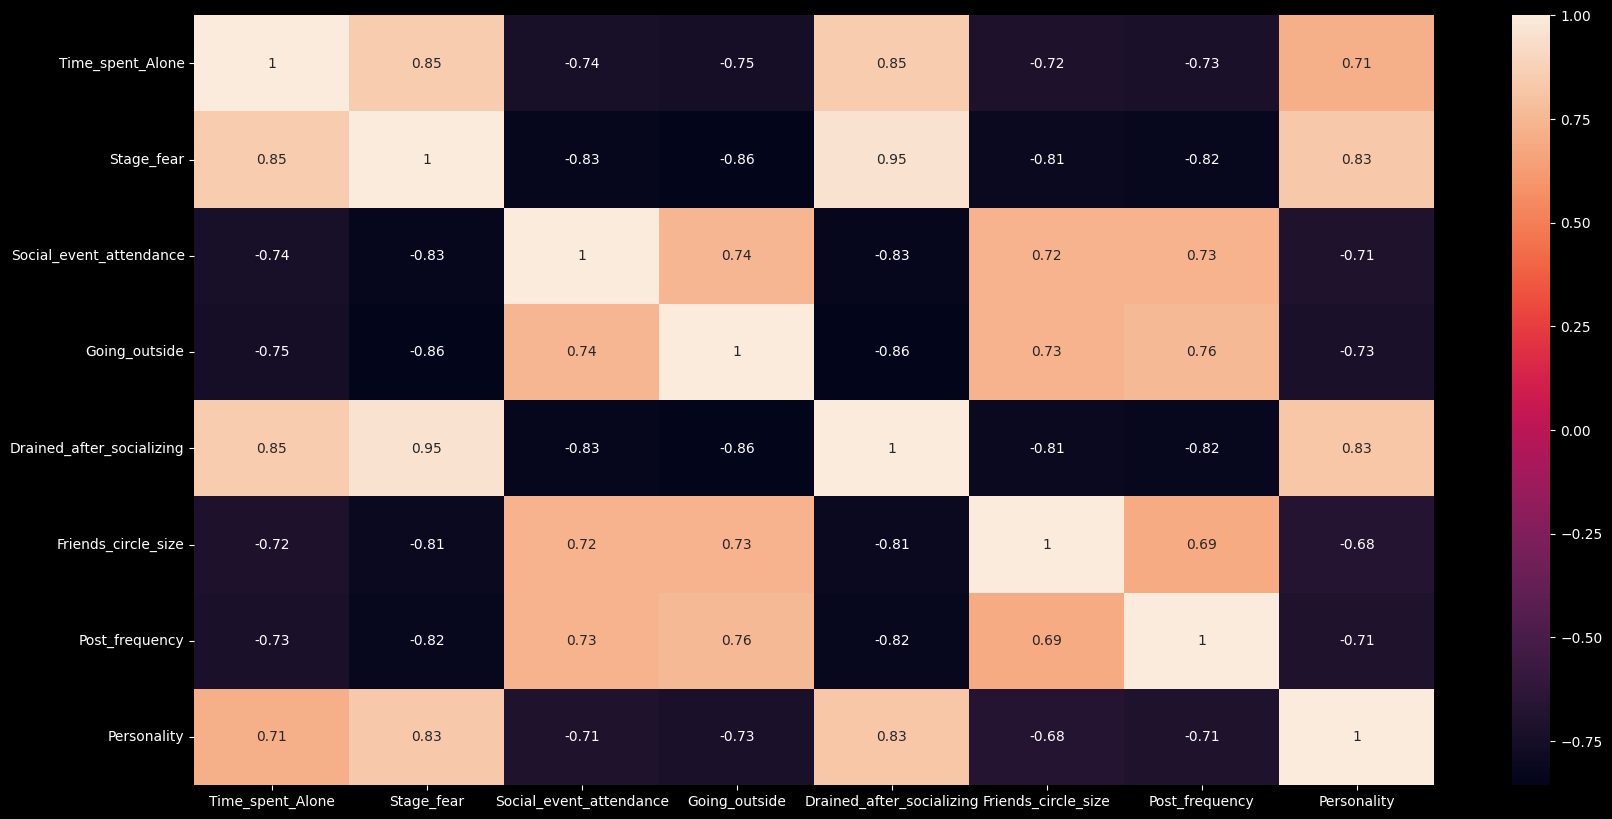

In [21]:
for col in cat_cols:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    
# Let us visualize correlation using a heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

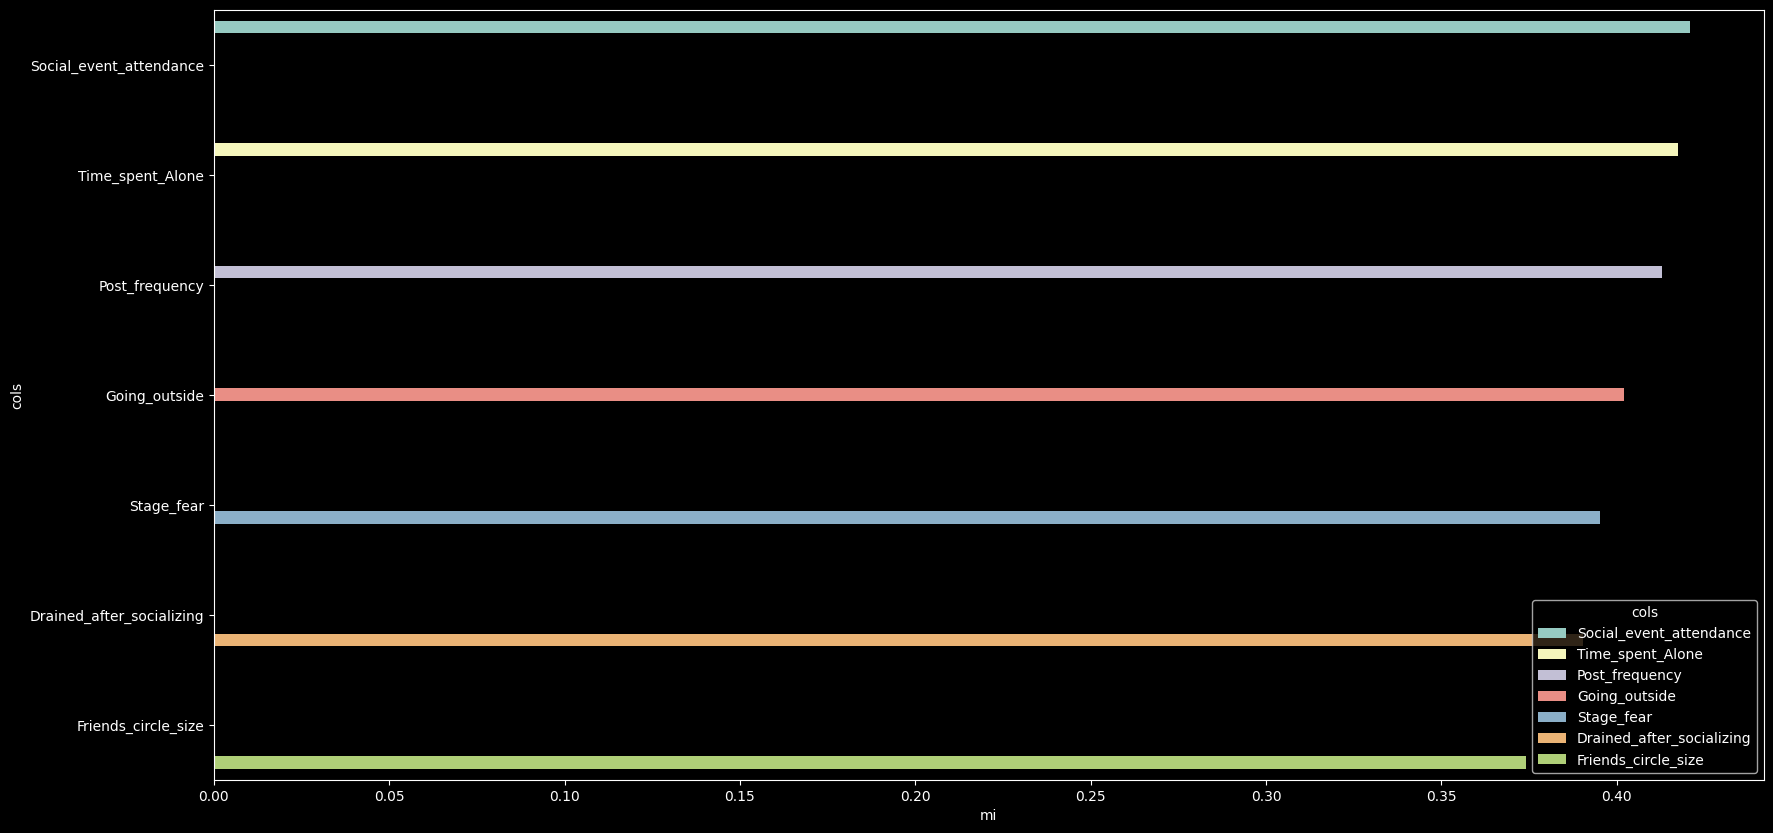

In [22]:
# Let us calculate mutual information and visualize them using bar plots
x=df.drop(columns='Personality')
y=df['Personality']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'cols':x.columns,'mi':mi})
mi_df.sort_values(by='mi',ascending=False,inplace=True)

plt.figure(figsize=(20,10))
sns.barplot(data=mi_df,x='mi',y='cols',hue='cols')
plt.show()

# Splitting the Data

**Note: It is good practice to first split your data into training and testing sets before performing any preprocessing, exploratory data analysis (EDA), or feature engineering. This helps prevent data leakage and overfitting by ensuring the test set remains completely unseen and unbiased during model training and preparation**

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.2,random_state=20)
print(x_t.shape,x_te.shape,y_t.shape,y_te.shape)

(2009, 7) (503, 7) (2009,) (503,)


# Model

In [25]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV

In [26]:
dt=DecisionTreeClassifier()
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
print(alphas)
param={'ccp_alpha':alphas}
ndt=GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=10)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
bestalpha=ndt.best_params_['ccp_alpha']

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.31840053e-05 8.29600133e-05 8.71080139e-05
 9.95520159e-05 1.06662874e-04 1.10613351e-04 1.10613351e-04
 1.16144019e-04 1.24440020e-04 1.24440020e-04 1.24440020e-04
 1.38266689e-04 1.40393869e-04 1.40969647e-04 1.49328024e-04
 1.49328024e-04 1.49328024e-04 1.59283225e-04 1.65920027e-04
 1.65920027e-04 1.65920027e-04 1.65920027e-04 1.65920027e-04
 1.65920027e-04 1.65920027e-04 1.65920027e-04 1.65920027e-04
 1.65920027e-04 1.65920027e-04 1.65920027e-04 1.65920027e-04
 1.65920027e-04 1.65920027e-04 1.65920027e-04 1.76981362e-04
 1.89622887e-04 1.96484242e-04 2.10955462e-04 2.16772473e-04
 2.28140037e-04 2.39662261e-04 2.41338220e-04 2.41769182e-04
 2.43349372e-04 2.44929563e-04 2.47497373e-04 2.49939104e-04
 2.65472042e-04 2.65472042e-04 2.65472042e-04 2.65472042e-04
 2.84434331e-04 2.84936422e-04 2.96909521e-04 2.98656048e-04
 2.98656048e-04 2.98656048e-04 2.98656048e-04 2.99094540e-04
 3.01672776e-04 3.032250

In [27]:
param={'criterion':['gini','entropy'],
        'max_depth':list(np.arange(2,12)),
    'min_samples_split':list(np.arange(2,12)),
   'min_samples_leaf':list(np.arange(2,12)),
       'max_features':[None,'sqrt','log2']}
dt=DecisionTreeClassifier(ccp_alpha=bestalpha)
ndt=GridSearchCV(dt,param_grid=param,scoring='accuracy',cv=10,n_jobs=-1)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
ndt=ndt.best_estimator_

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 3}
0.9263457711442786


# Prediction

In [28]:
pred=ndt.predict(x_te)

# Evaluation Metrics

In [29]:
from sklearn.metrics import classification_report,confusion_matrix

In [30]:
cr=classification_report(y_te,pred)
cm=confusion_matrix(y_te,pred)
print(cr)

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       282
           1       0.92      0.94      0.93       221

    accuracy                           0.94       503
   macro avg       0.93      0.94      0.94       503
weighted avg       0.94      0.94      0.94       503



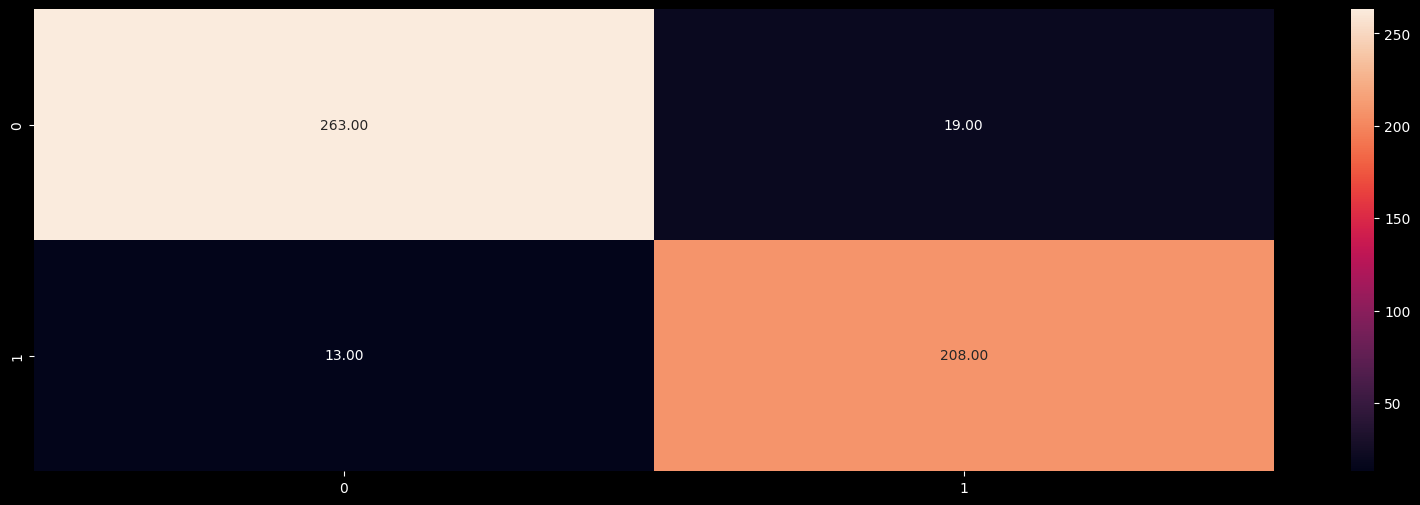

In [31]:
plt.figure(figsize=(20,6))
sns.heatmap(cm,annot=True,fmt='.2f')
plt.show()

**Kindly provide suggestions and feedback to improve this Notebook**<br>
**Kindly Upvote if you liked this notebook and has helped you in some way :)**